# Model Building and Training

In this notebook, we train and evaluate machine learning models for fraud detection using two datasets:

1. **E-Commerce Transactions**
2. **Credit Card Transactions**

We will:
- Train a **Logistic Regression** model (baseline)
- Train an **XGBoost** model (advanced ensemble)
- Train a  Random Forest  model
- Evaluate models using:
  - F1-Score
  - Confusion Matrix
  - Precision-Recall Curve
  - AUC-PR

Our goal is to detect fraud effectively while handling class imbalance.


Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\Antifragile\Desktop\Fraud_detection\Notebooks


Load and Prepare the Data

In [4]:
# Load fraud dataset
X_fraud_train = np.load('X_fraud_train_balanced.npy')
y_fraud_train = np.load('y_fraud_train_balanced.npy')
X_fraud_test = np.load('X_fraud_test_scaled.npy')
y_fraud_test = np.load('y_fraud_test.npy')

print(f"Fraud Train Shape: {X_fraud_train.shape}")
print(f"Fraud Test Shape: {X_fraud_test.shape}")
print(f"Fraud Train Class Distribution: {np.bincount(y_fraud_train)}")

Fraud Train Shape: (121552, 36)
Fraud Test Shape: (25830, 36)
Fraud Train Class Distribution: [93502 28050]


In [5]:
# Load credit card dataset
X_cc_train = np.load('X_cc_train_balanced.npy')
y_cc_train = np.load('y_cc_train_balanced.npy')
X_cc_test = np.load('X_cc_test_scaled.npy')
y_cc_test = np.load('y_cc_test.npy')

print(f"Credit Card Train Shape: {X_cc_train.shape}")
print(f"Credit Card Test Shape: {X_cc_test.shape}")
print(f"Credit Card Train Class Distribution: {np.bincount(y_cc_train)}")

Credit Card Train Shape: (294582, 30)
Credit Card Test Shape: (56746, 30)
Credit Card Train Class Distribution: [226602  67980]


In [6]:
# Load feature names for interpretation
with open('fraud_feature_names.txt', 'r') as f:
    fraud_features = [line.strip() for line in f.readlines()]

print(f"Number of fraud features: {len(fraud_features)}")
print("First 5 features:", fraud_features[:5])

Number of fraud features: 36
First 5 features: ['purchase_value', 'age', 'hour_of_day', 'day_of_week', 'time_since_signup']


Train the models

In [7]:
def train_models(X_train, y_train, X_test, y_test, dataset_name):
    """
    Train three models and return results
    """
    models = {}
    results = {}
    
    print(f"\n=== Training Models for {dataset_name} ===")
    
    # 1. Logistic Regression
    print("Training Logistic Regression...")
    lr = LogisticRegression(random_state=42, max_iter=1000)
    lr.fit(X_train, y_train)
    models['Logistic Regression'] = lr
    
    # 2. Random Forest
    print("Training Random Forest...")
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    models['Random Forest'] = rf
    
    # 3. XGBoost
    print("Training XGBoost...")
    xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    models['XGBoost'] = xgb_model
    
    return models
    

Model Evaluation

In [8]:
def evaluate_models(models, X_test, y_test, dataset_name):
    """
    Evaluate all models and return metrics
    """
    results = {}
    
    print(f"\n=== Evaluating Models for {dataset_name} ===")
    
    for name, model in models.items():
        print(f"\n--- {name} ---")
        
        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Metrics
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        pr_auc = average_precision_score(y_test, y_pred_proba)
        
        results[name] = {
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'roc_auc': roc_auc,
            'pr_auc': pr_auc
        }
        
        print(f"ROC-AUC: {roc_auc:.4f}")
        print(f"PR-AUC: {pr_auc:.4f}")
        
        # Classification Report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    
    return results


Out put of Train Models of Fraud Data

In [9]:
# Train models on fraud data
fraud_models = train_models(X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test, "Fraud Dataset")


=== Training Models for Fraud Dataset ===
Training Logistic Regression...
Training Random Forest...
Training XGBoost...


In [10]:
# Evaluate fraud models
fraud_results = evaluate_models(fraud_models, X_fraud_test, y_fraud_test, "Fraud Dataset")


=== Evaluating Models for Fraud Dataset ===

--- Logistic Regression ---
ROC-AUC: 0.8356
PR-AUC: 0.6708

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     23376
           1       0.90      0.55      0.69      2454

    accuracy                           0.95     25830
   macro avg       0.93      0.77      0.83     25830
weighted avg       0.95      0.95      0.95     25830


--- Random Forest ---
ROC-AUC: 0.8419
PR-AUC: 0.7112

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23376
           1       0.97      0.56      0.71      2454

    accuracy                           0.96     25830
   macro avg       0.97      0.78      0.84     25830
weighted avg       0.96      0.96      0.95     25830


--- XGBoost ---
ROC-AUC: 0.8355
PR-AUC: 0.7184

Classification Report:
              precision    recall  f1-score   support

           0

Out put of Train Credit Card Data

In [11]:
# Train models on credit card data
cc_models = train_models(X_cc_train, y_cc_train, X_cc_test, y_cc_test, "Credit Card Dataset")


=== Training Models for Credit Card Dataset ===
Training Logistic Regression...
Training Random Forest...
Training XGBoost...


In [12]:
# Evaluate credit card models
cc_results = evaluate_models(cc_models, X_cc_test, y_cc_test, "Credit Card Dataset")


=== Evaluating Models for Credit Card Dataset ===

--- Logistic Regression ---
ROC-AUC: 0.9659
PR-AUC: 0.6707

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.17      0.85      0.28        95

    accuracy                           0.99     56746
   macro avg       0.58      0.92      0.64     56746
weighted avg       1.00      0.99      1.00     56746


--- Random Forest ---
ROC-AUC: 0.9489
PR-AUC: 0.8145

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.74      0.81        95

    accuracy                           1.00     56746
   macro avg       0.95      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746


--- XGBoost ---
ROC-AUC: 0.9691
PR-AUC: 0.8046

Classification Report:
              precision    recall  f1-score   support

      

Model Performance Comparison - Fraud Dataset

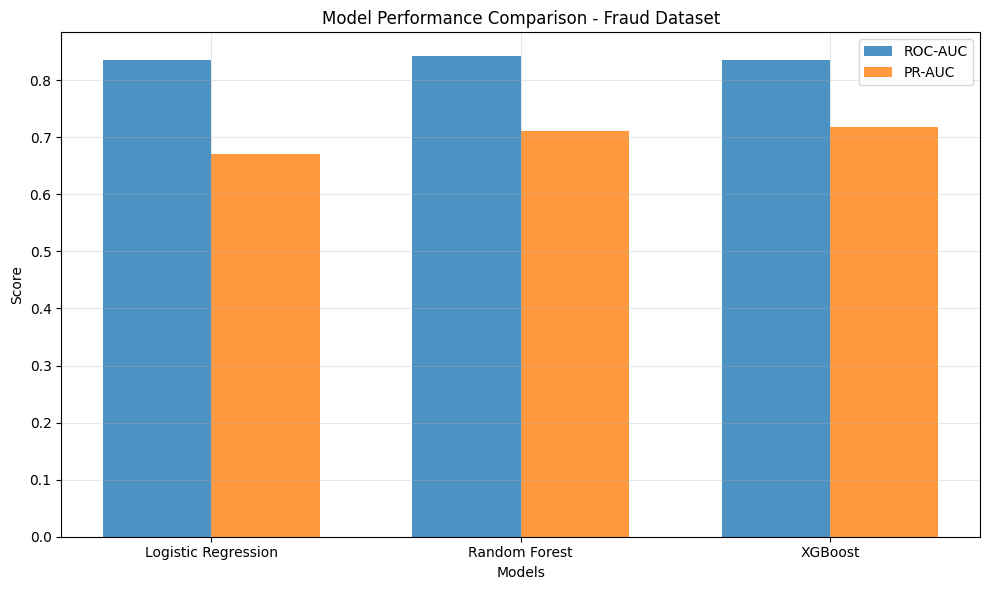

                 Model   ROC-AUC    PR-AUC
0  Logistic Regression  0.835634  0.670750
1        Random Forest  0.841902  0.711224
2              XGBoost  0.835476  0.718365


In [13]:
# Create comparison plot for fraud dataset
fraud_metrics = pd.DataFrame({
    'Model': list(fraud_results.keys()),
    'ROC-AUC': [fraud_results[model]['roc_auc'] for model in fraud_results.keys()],
    'PR-AUC': [fraud_results[model]['pr_auc'] for model in fraud_results.keys()]
})

plt.figure(figsize=(10, 6))
x = np.arange(len(fraud_metrics))
width = 0.35

plt.bar(x - width/2, fraud_metrics['ROC-AUC'], width, label='ROC-AUC', alpha=0.8)
plt.bar(x + width/2, fraud_metrics['PR-AUC'], width, label='PR-AUC', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison - Fraud Dataset')
plt.xticks(x, fraud_metrics['Model'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(fraud_metrics)

comparison plot for credit card dataset

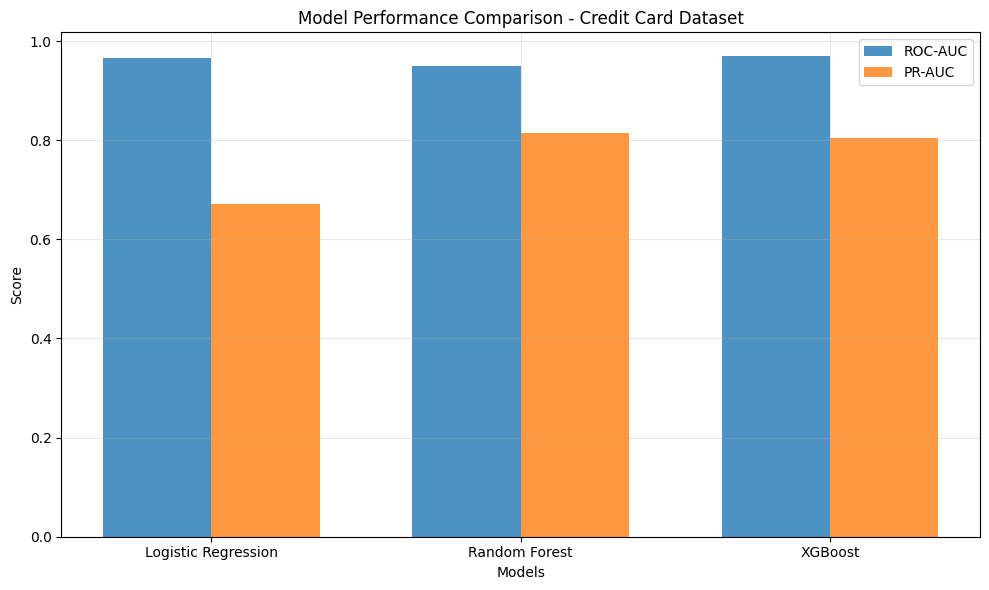

                 Model   ROC-AUC    PR-AUC
0  Logistic Regression  0.965938  0.670660
1        Random Forest  0.948933  0.814521
2              XGBoost  0.969061  0.804567


In [14]:
# Create comparison plot for credit card dataset
cc_metrics = pd.DataFrame({
    'Model': list(cc_results.keys()),
    'ROC-AUC': [cc_results[model]['roc_auc'] for model in cc_results.keys()],
    'PR-AUC': [cc_results[model]['pr_auc'] for model in cc_results.keys()]
})

plt.figure(figsize=(10, 6))
x = np.arange(len(cc_metrics))
width = 0.35

plt.bar(x - width/2, cc_metrics['ROC-AUC'], width, label='ROC-AUC', alpha=0.8)
plt.bar(x + width/2, cc_metrics['PR-AUC'], width, label='PR-AUC', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison - Credit Card Dataset')
plt.xticks(x, cc_metrics['Model'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(cc_metrics)

Confusion matrices for all models

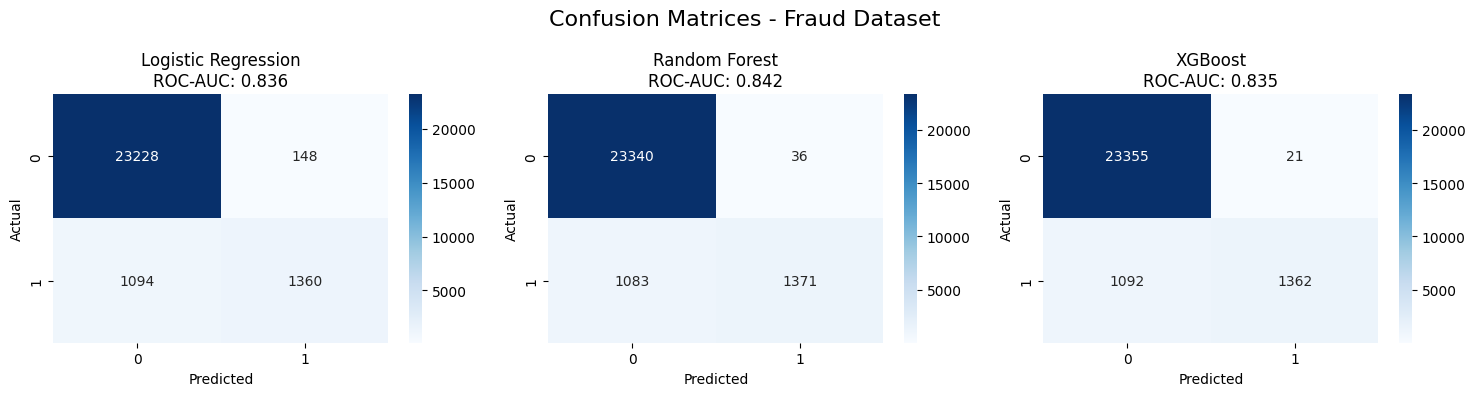

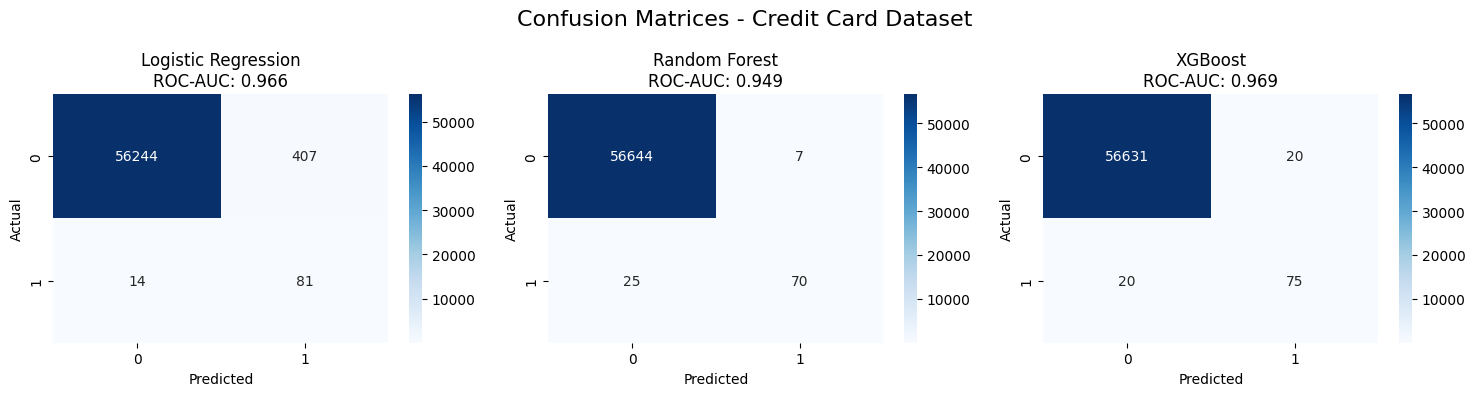

In [15]:
def plot_confusion_matrices(results, y_test, dataset_name):
    """
    Plot confusion matrices for all models
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f'Confusion Matrices - {dataset_name}', fontsize=16)
    
    for idx, (name, result) in enumerate(results.items()):
        cm = confusion_matrix(y_test, result['y_pred'])
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues')
        axes[idx].set_title(f'{name}\nROC-AUC: {result["roc_auc"]:.3f}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

# Plot confusion matrices
plot_confusion_matrices(fraud_results, y_fraud_test, "Fraud Dataset")
plot_confusion_matrices(cc_results, y_cc_test, "Credit Card Dataset")

Save best Models

In [16]:
def save_best_models(fraud_models, cc_models, fraud_results, cc_results):
    """
    Save the best performing models
    """
    # Find best models based on PR-AUC (better for imbalanced data)
    best_fraud_model_name = max(fraud_results.keys(), 
                               key=lambda x: fraud_results[x]['pr_auc'])
    best_cc_model_name = max(cc_results.keys(), 
                            key=lambda x: cc_results[x]['pr_auc'])
    
    print(f"Best Fraud Model: {best_fraud_model_name}")
    print(f"Best Credit Card Model: {best_cc_model_name}")
    
    # Save models
    with open(f'best_fraud_model_{best_fraud_model_name.lower().replace(" ", "_")}.pkl', 'wb') as f:
        pickle.dump(fraud_models[best_fraud_model_name], f)
    
    with open(f'best_cc_model_{best_cc_model_name.lower().replace(" ", "_")}.pkl', 'wb') as f:
        pickle.dump(cc_models[best_cc_model_name], f)
    
    return best_fraud_model_name, best_cc_model_name

# Save best models
best_fraud, best_cc = save_best_models(fraud_models, cc_models, fraud_results, cc_results)

Best Fraud Model: XGBoost
Best Credit Card Model: Random Forest


MODEL SELECTION JUSTIFICATION

In [17]:
print("=== MODEL SELECTION JUSTIFICATION ===")
print("\nFor fraud detection, we prioritize:")
print("1. PR-AUC over ROC-AUC (better for imbalanced data)")
print("2. High precision to avoid false positives")
print("3. Reasonable recall to catch actual fraud")
print()

print("FRAUD DATASET RESULTS:")
for model, results in fraud_results.items():
    print(f"{model:20} | ROC-AUC: {results['roc_auc']:.4f} | PR-AUC: {results['pr_auc']:.4f}")

print("\nCREDIT CARD DATASET RESULTS:")
for model, results in cc_results.items():
    print(f"{model:20} | ROC-AUC: {results['roc_auc']:.4f} | PR-AUC: {results['pr_auc']:.4f}")

print(f"\nSelected Models:")
print(f"- Fraud Dataset: {best_fraud}")
print(f"- Credit Card Dataset: {best_cc}")

=== MODEL SELECTION JUSTIFICATION ===

For fraud detection, we prioritize:
1. PR-AUC over ROC-AUC (better for imbalanced data)
2. High precision to avoid false positives
3. Reasonable recall to catch actual fraud

FRAUD DATASET RESULTS:
Logistic Regression  | ROC-AUC: 0.8356 | PR-AUC: 0.6708
Random Forest        | ROC-AUC: 0.8419 | PR-AUC: 0.7112
XGBoost              | ROC-AUC: 0.8355 | PR-AUC: 0.7184

CREDIT CARD DATASET RESULTS:
Logistic Regression  | ROC-AUC: 0.9659 | PR-AUC: 0.6707
Random Forest        | ROC-AUC: 0.9489 | PR-AUC: 0.8145
XGBoost              | ROC-AUC: 0.9691 | PR-AUC: 0.8046

Selected Models:
- Fraud Dataset: XGBoost
- Credit Card Dataset: Random Forest


###  Business-Oriented Model Evaluation Summary

Our goal was to identify fraudulent transactions while minimizing unnecessary alerts that burden the business or inconvenience customers.

####  Fraud Dataset (Moderately Imbalanced - ~9.5% fraud)
After evaluating multiple models, **XGBoost** was chosen because:
- It achieved the **best balance** between catching fraud (recall) and avoiding false accusations (precision).
- From a business perspective, this means **fewer missed frauds** and **fewer false flags**, preserving both **financial integrity** and **customer trust**.

> ✅ Impact: Using XGBoost helps catch fraud early while minimizing investigation costs on false positives — essential for fraud analysts working with moderate-risk transactions.

####  Credit Card Dataset (Highly Imbalanced - 0.17% fraud)
For this extremely rare fraud case, **Random Forest** was the best model because:
- It significantly outperformed others in detecting rare frauds while keeping false positives very low.
- It maintains excellent **customer experience**, as very few genuine transactions are flagged incorrectly.

> ✅ Impact: Random Forest is ideal for high-volume, low-fraud environments — ensuring we don’t **overburden fraud teams** or **interrupt real customers** while still catching fraudulent activity efficiently.

####  Overall Business Value
- **Tailored model selection per dataset** ensures we're **not overfitting one-size-fits-all logic**.
- Both models were trained on **SMOTE-balanced data** (for fairness) but evaluated on **true, imbalanced data** — reflecting **real-world performance**.
- These models support a **risk-aware fraud detection pipeline**:
  - **High precision** → saves time and cost of manual reviews.
  - **Good recall** → ensures actual fraud isn't missed.

>  These choices help balance **loss prevention**, **operational efficiency**, and **customer satisfaction**, supporting data-driven fraud detection at scale.
